In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 1000)
plt.style.use('seaborn')

In [2]:
# load and read dataset
sales = pd.read_csv('/content/drive/MyDrive/dataset/2019_sales.csv')

sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [3]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Handle missing values

In [4]:
# sum the missing values
sales.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [5]:
# take a closer look
sales[sales.isna().any(axis=1)].head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
1571,NaN,NaN,NaN,NaN,NaN,NaN
1992,NaN,NaN,NaN,NaN,NaN,NaN
2265,NaN,NaN,NaN,NaN,NaN,NaN
2798,NaN,NaN,NaN,NaN,NaN,NaN
3024,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# drop the 545 NA values
sales.dropna(inplace=True)

sales.shape

(186305, 6)

## Handle duplicated values

In [7]:
# sum the duplicated values
sales.duplicated().sum()

618

In [8]:
# take a closer look
sales.loc[sales.duplicated(subset=['Order ID', 'Product'], keep=False)].head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1301,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
1302,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
1682,178158,USB-C Charging Cable,1,11.95,04/28/19 21:13,"197 Center St, San Francisco, CA 94016"
1684,178158,USB-C Charging Cable,1,11.95,04/28/19 21:13,"197 Center St, San Francisco, CA 94016"
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [9]:
sales.loc[sales.duplicated(subset=['Order ID', 'Product'])].shape

(665, 6)

In [10]:
# drop duplicated for cols 'Order ID' and 'Product'
sales.drop_duplicates(subset=['Order ID', 'Product'], inplace=True)

sales.shape

(185640, 6)

In [11]:
# as you can see above, we have row value that has same value like column name, and we have to delete it first
sales[sales['Order ID'] == 'Order ID']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [12]:
# delete the row
sales.drop([519], inplace=True)

sales.shape

(185639, 6)

## Change columns name

In [13]:
# replace space with underscore
sales.columns = sales.columns.str.replace(' ', '_')

sales.columns

Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address'],
      dtype='object')

In [14]:
# change columns name
sales.rename(columns={
    'Quantity_Ordered': 'Quantity',
    'Price_Each': 'Price',
    'Purchase_Address': 'Address'
}, inplace=True)

sales.columns

Index(['Order_ID', 'Product', 'Quantity', 'Price', 'Order_Date', 'Address'], dtype='object')

## Change datatype

In [15]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185639 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Order_ID    185639 non-null  object
 1   Product     185639 non-null  object
 2   Quantity    185639 non-null  object
 3   Price       185639 non-null  object
 4   Order_Date  185639 non-null  object
 5   Address     185639 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [16]:
sales.head(1)

,Order_ID,Product,Quantity,Price,Order_Date,Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"


In [17]:
# change 'Order_ID', 'Quantity', 'Price' to int and float
numCol = ['Order_ID', 'Quantity', 'Price']

sales[numCol] = sales[numCol].apply(pd.to_numeric)

sales[numCol].dtypes

Order_ID      int64
Quantity      int64
Price       float64
dtype: object

In [18]:
# change 'Order_Date' to datetime
sales['Order_Date'] = pd.to_datetime(sales['Order_Date'])

sales['Order_Date'].dtypes

dtype('<M8[ns]')

## Business question

#### *Q1: What was the best month for sales?*

lets create a column for months and revenue first!

In [19]:
sales.insert(5, 'Month', 0)
sales['Month'] = sales['Order_Date'].dt.month

sales.head()

,Order_ID,Product,Quantity,Price,Order_Date,Month,Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,4,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,4,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,4,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,4,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,4,"333 8th St, Los Angeles, CA 90001"


In [20]:
sales.insert(4, 'Revenue', 0)
sales['Revenue'] = sales['Quantity'] * sales['Price']

sales.head()

,Order_ID,Product,Quantity,Price,Revenue,Order_Date,Month,Address
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,4,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,4,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,4,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,4,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,4,"333 8th St, Los Angeles, CA 90001"


lets make the visualization!

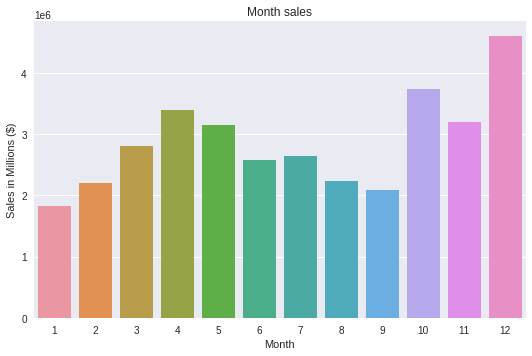

In [21]:
top_month = sales.groupby('Month')['Revenue'].sum().reset_index()

# create the viz
sns.catplot(
    kind='bar',
    data=top_month,
    x='Month',
    y='Revenue',
    height=5,
    aspect=1.5
)

plt.title('Month sales')
plt.ylabel('Sales in Millions ($)');

As you can see above, the best month for sales was December.

### *Q2: What city sold the most product?*

lets create column for the city

In [22]:
sales.insert(8, 'City', 'x')

In [23]:
# get the city func i.e: Dallas
def get_city(x):
  return x.split(',')[1]

# get the state func i.e: (TX)
def get_state(x):
  return x.split(',')[2].split(' ')[1]

sales['City'] = sales['Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
sales.head()

,Order_ID,Product,Quantity,Price,Revenue,Order_Date,Month,Address,City
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,4,"917 1st St, Dallas, TX 75001",Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,4,"682 Chestnut St, Boston, MA 02215",Boston (MA)
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,4,"333 8th St, Los Angeles, CA 90001",Los Angeles (CA)


lets make the visualization!

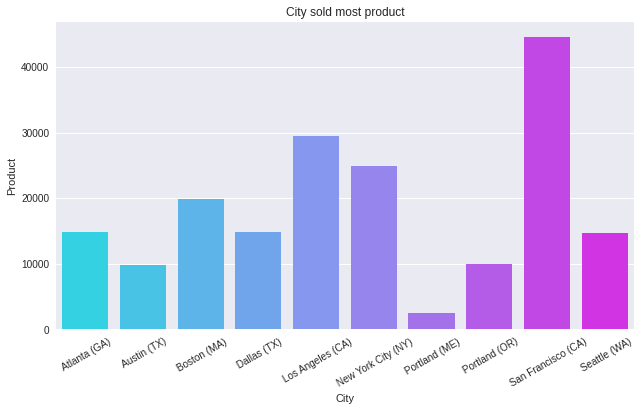

In [24]:
top_city = sales.groupby('City')['Product'].count().reset_index()

# create the viz
sns.catplot(
    kind='bar',
    data=top_city,
    x='City',
    y='Product',
    height=5,
    aspect=1.8,
    palette='cool'
)

plt.title('City sold most product')
plt.xticks(rotation=30);

Most products were sold in San Francisco (CA)

### *Q3: What time should we display advertisements to maximize the likelihood of purchases?*

lets create hour column first

In [25]:
sales.insert(6, 'Hour', 0)
sales['Hour'] = sales['Order_Date'].dt.hour

sales.head()

,Order_ID,Product,Quantity,Price,Revenue,Order_Date,Hour,Month,Address,City
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,8,4,"917 1st St, Dallas, TX 75001",Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,22,4,"682 Chestnut St, Boston, MA 02215",Boston (MA)
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,14,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,14,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,9,4,"333 8th St, Los Angeles, CA 90001",Los Angeles (CA)


lets make the visualization!

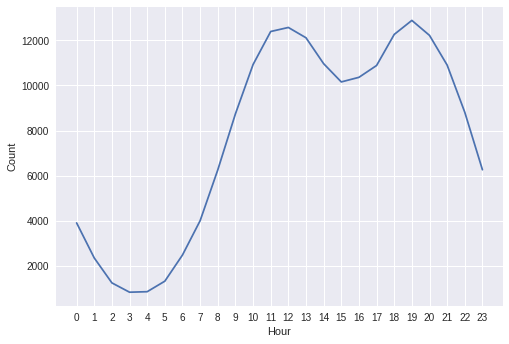

In [26]:
top_hour = sales.groupby('Hour')['Product'].count().reset_index()

ax = sns.lineplot(
    data=top_hour,
    x='Hour',
    y='Product'
)

ax.set(
    ylabel='Count',
    xticks=top_hour.index
);

My recommendation is below 11am and 7pm

### *Q4: What product sold the most? Why do you think it did?*

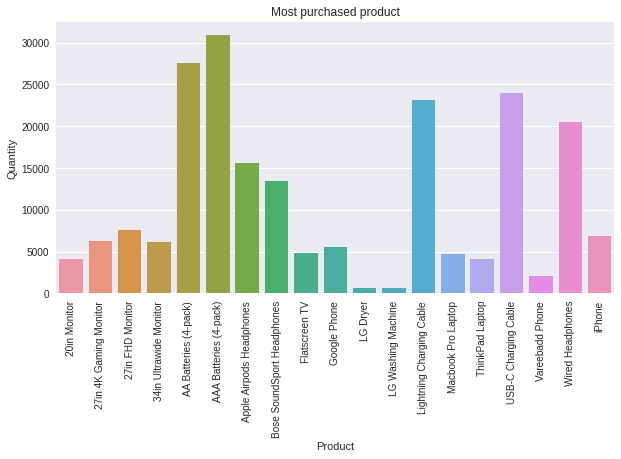

In [27]:
top_product = sales.groupby('Product')['Quantity'].sum().reset_index()

# create the viz
plt.figure(figsize=(10, 5))

sns.barplot(
    data=top_product,
    x='Product',
    y='Quantity'
)

plt.title('Most purchased product')
plt.xticks(rotation=90);

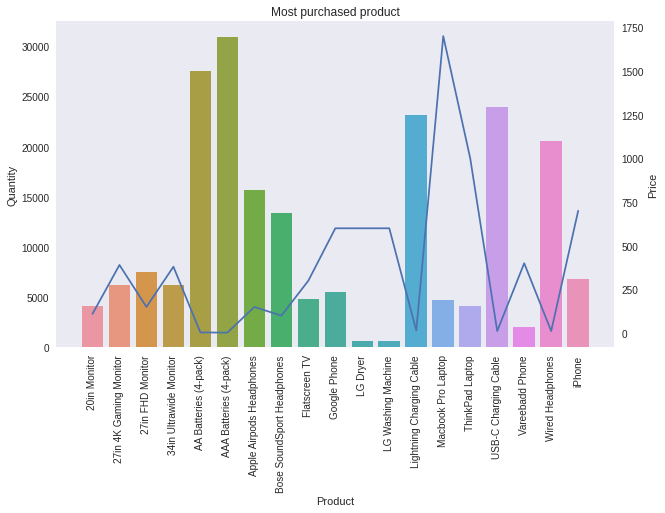

In [28]:
price = sales.groupby('Product')['Price'].mean().reset_index()

# create the viz
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

ax1 = sns.barplot(
    data=top_product,
    x='Product',
    y='Quantity',
    ax=ax1
)

ax2 = sns.lineplot(
    data=price,
    x='Product',
    y='Price',
    palette='dark',
    ax=ax2
)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_title('Most purchased product')

ax1.grid(False)
ax2.grid(False);

Batteries, Charging Cables and Wired Headphones were the most sold product.<br>
Why? From the data above, we can see that maybe because they have a cheap price